In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import csv
import math

In [ ]:
# Creating a dictionary
def fit(X_train, Y_train):
    result = {}
    class_values = set(Y_train)   # Taking the set of all classes available in the target
    for current_class in class_values:
        result[current_class] = {}
        result["total_data_pts"] = len(Y_train)    # Storing the length of Y_train
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        num_features = X_train.shape[1]
        result[current_class]["total_count"] = len(Y_train_current)  # Storing the count of a particular class in Y_train
        for j in range(1, num_features + 1):
            result[current_class][j] = {}
            # storing mean and standard deviation of a particular feature of a particular class
            result[current_class][j]["mean"] = np.mean(X_train_current[:, j - 1])
            result[current_class][j]["stdev"] = np.std(X_train_current[:, j - 1])

    return result

### The general form of Gaussian probability density function is
![blob%20%286%29.jpeg](attachment:blob%20%286%29.jpeg)

In [ ]:
# finding the likelihood by assuming Gaussian distribution
def Likelihood(x, mean, stdev):
    exp = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    l = (1/(math.sqrt(2*math.pi)*stdev))*exp
    return l

In [ ]:
# taking logarithm to the probabilities to account for very small values.
def probability(dictionary, x, current_class):
    prior = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data_pts"])
    output = prior
    num_features = len(dictionary[current_class].keys()) - 1;
    for j in range(1, num_features + 1):
        value = x[j - 1]
        Avg = dictionary[current_class][j]["mean"]
        stand_deviation = dictionary[current_class][j]["stdev"]
        current_value_probability = Likelihood(value, Avg, stand_deviation)
        output = output + np.log(current_value_probability)
    return output

In [ ]:
# taking input of each data point from predictData
def predict_class(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000000   # assuming the best probability as low as possible to get updated at the first run
    best_class = -1000
    for current_class in classes:
        if (current_class == "total_data_pts"):
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (p_current_class > best_p):
            best_p = p_current_class       # updating the probability
            best_class = current_class        # updating the class
    return best_class

In [ ]:
# Analysing each of the X_data to predict the output 
def predictData(dictionary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predict_class(dictionary, x)
        y_pred.append(x_class)
    return y_pred

In [ ]:
#Loadind the diabetes dataset
dataset = pd.read_csv("Diabetes_RF.csv")
print(dataset.shape)
# separating the data from the target attributes
X = dataset.iloc[:,0:7].values
Y = dataset.iloc[:,8].values

(768, 9)


In [ ]:
# displaying top 5 rows of the dataset
dataset.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [ ]:
# splitting the data in 3:1 ratio for the training and testing, respectively
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25)

In [ ]:
# fitting the model
dictionary = fit(X_train,Y_train)

In [ ]:
# Making Predictions
Y_predict = predictData(dictionary,X_test)

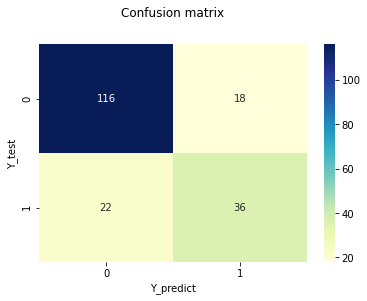

In [ ]:
#Evaluation 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cnf_matrix = metrics.confusion_matrix(Y_test,Y_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Y_test')
plt.xlabel('Y_predict')
plt.show()


In [ ]:
#classification report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

          NO       0.84      0.87      0.85       134
         YES       0.67      0.62      0.64        58

    accuracy                           0.79       192
   macro avg       0.75      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192

